# Project: Investigate The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This notebook will investigate data on over 10,000 movies from TMDb to answer the example questions from Udacity as well as some additional questions that interested me. The example questions from Udacity are:

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?

The additional questions that I chose to explore are:

3. Which movies have the highest/lowest budgets, profits, and review scores?
4. Which actors are associated with the highest reviewed movies? Most profitable movies?

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The starting point for this investigation is tmdb-movies.csv downloaded from Udacity.

### General Properties

In this section I load the CSV in to a pandas dataframe and take a high level look at the contents.

In [2]:
#Load data and print out a few lines
tmdb = pd.read_csv('tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Check rows, columns, data types, missing values
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Check descriptive stats for numeric variables
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#Check for duplicates
sum(tmdb.duplicated())

1

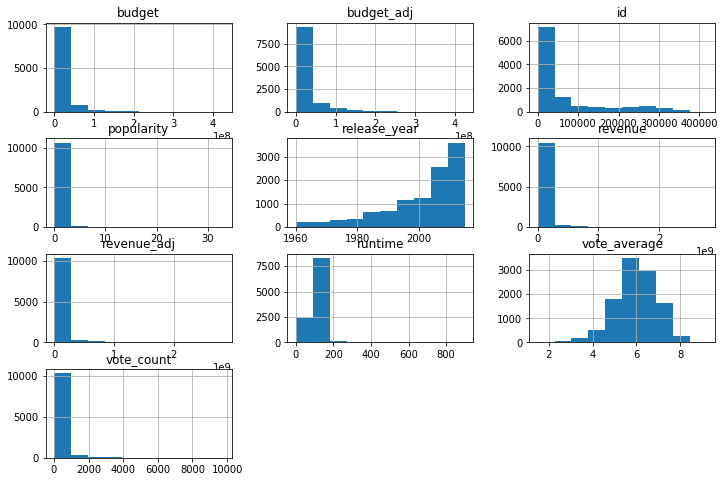

In [6]:
#Look at histograms to get a sense of the distribution of numeric variables
tmdb.hist(figsize=(12,8));

### Data Cleaning

### Drop Columns
First, I want to drop all columns that aren't relevant to the questions I want to answer (especially columns with long strings) to save time and space. Since I'm comparing dollar values from different years, I will use the adjusted budget and revenue columns which have been converted to 2010 dollars to account for inflation and drop the nominal values. It is arguable that some of the columns I'm dropping (especially production_companies) may be relevant to question #2 (properties associated with movies with high revenue), however for the sake of simplicity I made the decision to drop them.

In [7]:
#Drop columns not needed
tmdb_trim = tmdb.drop(columns=['imdb_id','budget','revenue','homepage','tagline','keywords','overview','production_companies'])
tmdb_trim.head(1)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Drop Duplicate Row
Next I want to look at the single duplicated row seen in the previous section and exclude it.

In [8]:
#Look at duplicate row
tmdb_trim[tmdb_trim.duplicated(keep=False)]

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#Exclude duplicate row and confirm there are no more duplicates
tmdb_trim.drop_duplicates(inplace=True)
sum(tmdb_trim.duplicated())

0

### Note on Missing Data
I noticed in the describe function output that a large portion of movies in TMDb report 0 budget and/or 0 revenue. When I answer questions related to budget, revenue, or profits I will want to exclude movies that don't have both positive budget and revenue. However, for now I will leave them because some of my questions are unrelated to those columns. Similarly, I will leave rows missing genre or cast for now but exclude them when investigating questions using those columns.

### Movie Runtime
According to the describe function output, the maximum runtime is 900 minutes (15 hours). This seems really long, since the longest movie I have heard of is probably one of the Lord of the Rings extended cuts, which never reach 5 hours even with credits. So I took a closer look at the distribution of runtime.

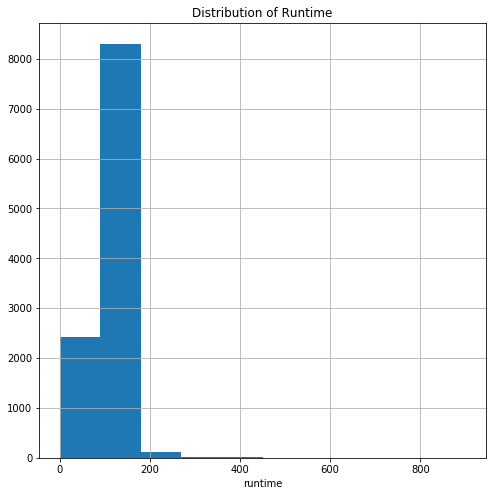

In [10]:
#Look at the distribution of runtime
tmdb_trim['runtime'].hist(figsize=(8,8))
plt.title('Distribution of Runtime')
plt.xlabel('runtime');

There appear to be a small number of movies with very long run times. I chose to look more closely at movies with runtimes greater than 5 hours to see what they were.

In [11]:
#Look at examples of rows longer than 5 hours
tmdb.query('runtime > 300').head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1865,220903,tt1533395,0.102223,0,0,Life,David Attenborough|Oprah Winfrey,http://www.bbc.co.uk/programmes/b00lbpcy,Martha Holmes|Simon Blakeney|Stephen Lyle,From the Makers of Planet Earth,...,David Attenborough's legendary BBC crew explai...,500,Documentary,British Broadcasting Corporation (BBC),12/14/09,24,7.0,2009,0.0,0.000000e+00
2107,43434,tt1321865,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,NaN,Olivier Assayas,The man who hijacked the world,...,"The story of Venezuelan revolutionary, Ilich R...",338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,5/19/10,35,6.2,2010,18000000.0,8.712790e+05
2170,367186,tt1453159,0.082894,0,0,The Pillars of the Earth,Ian McShane|Matthew Macfadyen|Eddie Redmayne|H...,NaN,Sergio Mimica-Gezzan,NaN,...,The Pillars of the Earth is an eight-part 2010...,421,Drama|History|Romance,Scott Free Productions|Tandem Communications|T...,7/23/10,22,7.3,2010,0.0,0.000000e+00
2214,189197,tt0374463,0.757082,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,http://www.hbo.com/the-pacific/index.html,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,Hell was an ocean away,...,"A 10-part mini-series from the creators of ""Ba...",540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,5/16/10,183,7.8,2010,120000000.0,0.000000e+00
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,9/9/01,313,8.0,2001,0.0,1.539360e+08


It looks like these are multi-part documentaries or TV series rather than what I would typically consider a movie. Unfortunately, I don't see any information I can use to cleanly and efficiently separate traditional movies from episodic content. I also saw that rows with the shortest runtimes seem to include lots of animated shorts and other brief videos I wouldn't consider traditional movies.

I considered excluding rows with Documentary or Animated in their genre column, however browsing the data I don't think such an exclusion based on genre would be effective at targeting traditional movies. Instead, I decided to introduce flexible boundaries based on runtime which should help focus more closely on traditional movies but also allow me to come back at any time and adjust the runtime cutoffs to see how it affects my results. This will also make it easy to exclude rows with 0 runtime. This is definitely not a perfect solution, but I could not come up with a better quick systematic patch off the top of my head.

For the cutoffs shown in this notebook, I chose a somewhat arbitrary lower bound of 60 minutes and an upper bound of 242 minutes because that is the length of Hamlet, the first title I recognized as a non-episodic movie when browsing by descending runtime. I wasn't confident in my ability to distinguish movies for shorter runtimes, hence the somewhat arbitrary lower bound.

In [12]:
#Apply upper and lower bounds for runtime
runtime_lower_bound = 60
runtime_upper_bound = 242
tmdb_trim = tmdb_trim.query('runtime >= @runtime_lower_bound and runtime <= @runtime_upper_bound')

In [13]:
#Check that the upper and lower bounds were applied as expected
tmdb_trim.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,1.050600e+04,1.050600e+04
mean,64185.080240,0.657411,103.451932,223.289739,5.951532,2001.189130,1.808586e+07,5.305204e+07
std,90696.288373,1.010775,19.814908,584.377876,0.928207,12.832213,3.465994e+07,1.467307e+08
min,5.000000,0.000188,60.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10476.250000,0.212015,90.000000,17.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,19828.500000,0.389146,99.000000,39.000000,6.000000,2005.000000,0.000000e+00,0.000000e+00
75%,72195.250000,0.725636,112.000000,152.000000,6.600000,2011.000000,2.189312e+07,3.622332e+07
max,417859.000000,32.985763,242.000000,9767.000000,8.900000,2015.000000,4.250000e+08,2.827124e+09


### Calculate Profit
Several of my questions are related to profitability of movies, which I will calculate in 2010 dollars as the difference between the adjusted revenue and the adjusted budget columns when both columns are greater than 0.

In [14]:
#Create a function to calculate profit for rows with positive revenue and budget
def get_profit(row):
    if row['revenue_adj'] > 0 and row['budget_adj'] > 0:
        return row['revenue_adj'] - row['budget_adj']
    else:
        return 0

#Also calculate profit as a percentage of budget
def get_profit_pct(row):
    if row['revenue_adj'] > 0 and row['budget_adj'] > 0:
        return (row['revenue_adj'] - row['budget_adj'])/row['budget_adj']
    else:
        return 0
    
#Apply the function to the dataframe
tmdb_trim['profit_adj'] = tmdb_trim.apply(get_profit, 1)
tmdb_trim['profit_adj_pct'] = tmdb_trim.apply(get_profit_pct, 1)
tmdb_trim.head(2)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,9.090192
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,1.522909


### Genre and Cast
To answer questions related to genre and cast, I think it will be easier to split the current strings in to lists of strings where each string in each list is a single genre or actor.

In [15]:
#Convert strings separated by | to lists of strings
tmdb_trim['genres'] = tmdb_trim['genres'].str.split('|')
tmdb_trim['cast'] = tmdb_trim['cast'].str.split('|')
tmdb_trim.head(2)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct
0,135397,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,9.090192
1,76341,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,1.522909


### Release Date
To make it easier to access the release year, convert release date from a string to datetime type.

In [16]:
#Convert release date from string to date type
tmdb_trim['release_date'] = tmdb_trim['release_date'].astype('datetime64')
tmdb_trim.head(1)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct
0,135397,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,9.090192


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

Since I'm investigating a question related to genre, I first want to drop rows where there is no genre information. I already know from the info function above that release_year and popularity are present for all rows so I don't have to worry about those.

In [17]:
#Drop rows with no genre
tmdb_genre = tmdb_trim.dropna(subset=['genres'])
tmdb_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10490 entries, 0 to 10865
Data columns (total 15 columns):
id                10490 non-null int64
popularity        10490 non-null float64
original_title    10490 non-null object
cast              10447 non-null object
director          10464 non-null object
runtime           10490 non-null int64
genres            10490 non-null object
release_date      10490 non-null datetime64[ns]
vote_count        10490 non-null int64
vote_average      10490 non-null float64
release_year      10490 non-null int64
budget_adj        10490 non-null float64
revenue_adj       10490 non-null float64
profit_adj        10490 non-null float64
profit_adj_pct    10490 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 1.3+ MB


I'm going to use the popularity column to measure how popular movies in TMDb are, keeping in mind that I don't know exactly how that column was constructed. According to themoviedb.org, popularity is a score based on "...views, number of user ratings/watchlist/favourite additions and release date".

First, I looked at a scatter plot of popularity by release_year across all genres. The vast majority of popularity scores are less than 5, however there are many large outliers. The outliers are more extreme for recent years.

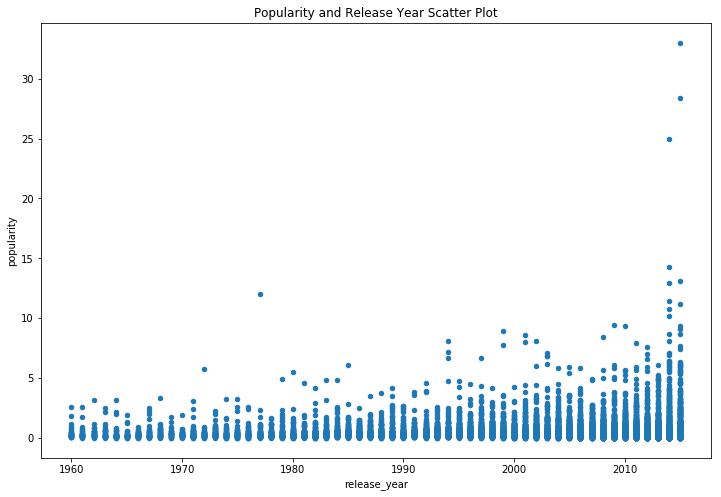

In [18]:
#Scatter plot of popularity by year
tmdb_genre.plot(x='release_year', y='popularity', kind='scatter', figsize=(12,8))
plt.title('Popularity and Release Year Scatter Plot');

I also looked at mean popularity by year across all genres. It appears that popularity is positively correlated with release_year in general. This makes sense given that the score is said to be based in part on release date and I would expect more recent movies to be more popular on average. The large spike in recent years is likely heavily influenced by the outliers we saw in recent years in the scatter plot.

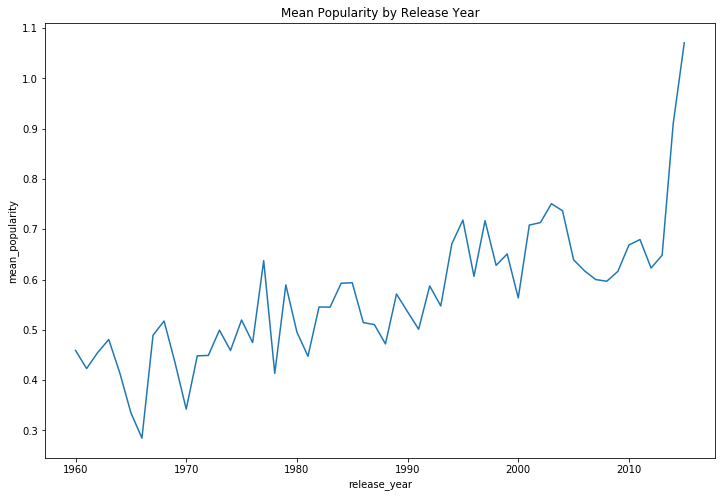

In [19]:
#View mean popularity by year
pop_yr = tmdb_genre.groupby('release_year')['popularity'].mean()
pop_yr.plot(kind='line', figsize=(12,8))
plt.title('Mean Popularity by Release Year')
plt.ylabel('mean_popularity');

Next, I created a set of unique genres so I can start creating descriptive stats by genre.

In [20]:
#Get a list of unique genres
unique_genres = set()

def get_genres(row):
    for genre in row['genres']:
        if genre not in unique_genres:
            unique_genres.add(genre)

#The goal of this apply is simply to fill up the unique_genres set, not to edit the dataframe
tmdb_genre.apply(get_genres, 1)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

Next, I wanted to get an overview of popularity by genre across all years before diving in to the more detailed breakdown by genre and year. For this, I chose to look at total popularity score instead of mean because if a particular genre has more movies in it that is also a large indicator of popularity. For example, if there are 100 Action movies in a year with mean popularity 1.0 and 10 Western movies in a year with mean popularity 1.2, I would want my metric to indicate that Action is a more popular genre.

Note that I chose to count each movie as a full movie for each genre it is listed under. This means there will be double counting of popularity score across genres, but never within a genre. So a movie that is both Action and Western will contribute its full popularity score to both the Action and Western genres rather than splitting the score between those genres.

In [21]:
#Get total popularity score across all years by genre
pop_genre = {}

for genre in list(unique_genres):
    mask = tmdb_genre['genres'].apply(lambda x: genre in x)
    df_temp = tmdb_genre[mask]
    pop_genre[genre] = df_temp['popularity'].sum()
    
pop_genre

{'Documentary': 88.37200199999998,
 'Western': 96.90453799999999,
 'Action': 2180.7252719999997,
 'Family': 917.7356529999997,
 'Fantasy': 886.058011,
 'Animation': 519.2111559999998,
 'TV Movie': 38.480745,
 'History': 187.84502199999997,
 'Music': 194.26008999999996,
 'Romance': 1008.5214049999998,
 'Comedy': 2210.0633099999995,
 'Thriller': 2149.78482,
 'Horror': 748.0878739999998,
 'Adventure': 1679.0718749999996,
 'War': 193.73162499999995,
 'Science Fiction': 1214.630048,
 'Mystery': 557.7695659999999,
 'Foreign': 35.84453799999999,
 'Drama': 2800.7734009999995,
 'Crime': 1006.9770689999998}

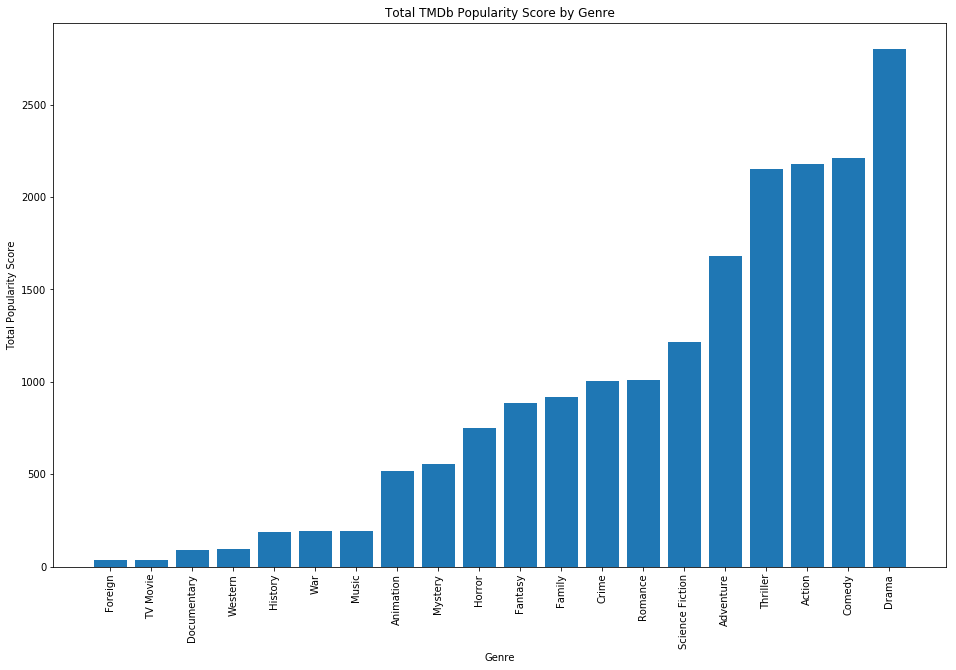

In [22]:
#Create a bar graph to look at popularity by genre
pop_genre_df = pd.Series(pop_genre).sort_values()
plt.subplots(figsize=(16, 10))
plt.bar(pop_genre_df.index, pop_genre_df)
plt.title('Total TMDb Popularity Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Popularity Score')
plt.xticks(rotation=90);

It looks like Drama is the leading genre in total popularity score followed by Comedy, Action, Thriller, and Adventure. Now I feel ready to start looking at popularity score by both genre and year. As a first pass, I looked at a line graph of the total popularity score by year where each line represents a different genre. I knew this would be a messy graph because we have 20 genres which means 20 lines in a small plot area and the colors become difficult to distinguish. However you can still see the top 5 categories tend to be the same 5 we saw in the overall bar graph, especially in more recent years: Drama, Comedy, Action, Thriller, and Adventure.

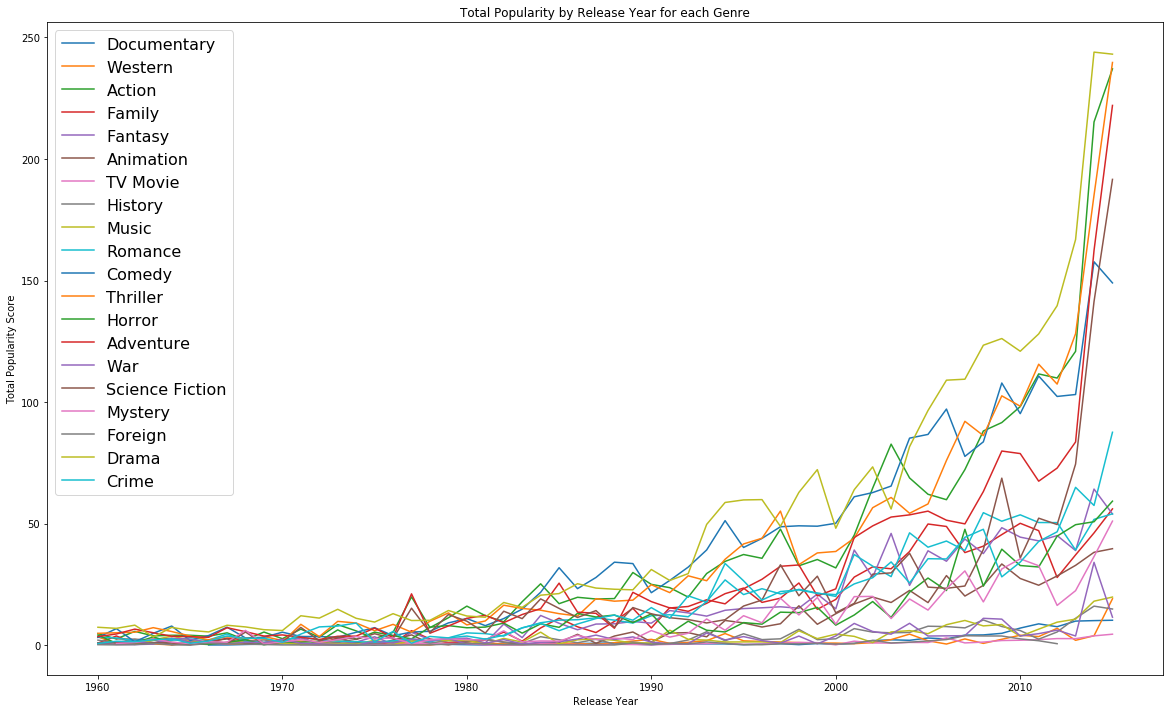

In [23]:
#Plot line graphs for each genre showing total popularity by year
plt.figure(figsize=(20,12))

for genre in list(unique_genres):
    mask = tmdb_genre['genres'].apply(lambda x: genre in x)
    df_temp = tmdb_genre[mask]
    pop_yr_genre = df_temp.groupby('release_year')['popularity'].sum()
    plt.plot(pop_yr_genre.index, pop_yr_genre.values, label=genre)

plt.legend(loc='upper left', prop={'size': 16})
plt.title('Total Popularity by Release Year for each Genre')
plt.ylabel('Total Popularity Score')
plt.xlabel('Release Year');

To clean up and focus the results, I decided to cut back and look only at the top 5 genres for each decade. To do this, I needed to convert release_year to decade. I do this below by writing a short function and applying it to the dataframe.

In [24]:
#Create a decade column, I know the year range is 1960-2015 from the describe function above
def get_decade(row):
    if row['release_year'] < 1970:
        return '1960-1969'
    elif row['release_year'] < 1980:
        return '1970-1979'
    elif row['release_year'] < 1990:
        return '1980-1989'
    elif row['release_year'] < 2000:
        return '1990-1999'
    elif row['release_year'] < 2010:
        return '2000-2009'
    else:
        return '2010-2015'
    
#Apply the function to the dataframe
tmdb_genre['decade'] = tmdb_genre.apply(get_decade, 1)
tmdb_genre.tail()

C:\Users\dpatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct,decade
10861,21,0.080598,The Endless Summer,"[Michael Hynson, Robert August, Lord 'Tally Ho...",Bruce Brown,95,[Documentary],2066-06-15,11,7.4,1966,0.000000,0.0,0.0,0.0,1960-1969
10862,20379,0.065543,Grand Prix,"[James Garner, Eva Marie Saint, Yves Montand, ...",John Frankenheimer,176,"[Action, Adventure, Drama]",2066-12-21,20,5.7,1966,0.000000,0.0,0.0,0.0,1960-1969
10863,39768,0.065141,Beregis Avtomobilya,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georg...",Eldar Ryazanov,94,"[Mystery, Comedy]",2066-01-01,11,6.5,1966,0.000000,0.0,0.0,0.0,1960-1969
10864,21449,0.064317,"What's Up, Tiger Lily?","[Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...",Woody Allen,80,"[Action, Comedy]",2066-11-02,22,5.4,1966,0.000000,0.0,0.0,0.0,1960-1969
10865,22293,0.035919,Manos: The Hands of Fate,"[Harold P. Warren, Tom Neyman, John Reynolds, ...",Harold P. Warren,74,[Horror],2066-11-15,15,1.5,1966,127642.279154,0.0,0.0,0.0,1960-1969


Now that I have a decade column I want to calculate the total popularity score for each genre by decade.

In [25]:
#Create an empty data frame, loop through genres and append one row for each genre with the total popularity grouped by decade
pop_dec_genre = pd.DataFrame()

for genre in list(unique_genres):
    mask = tmdb_genre['genres'].apply(lambda x: genre in x)
    df_temp = tmdb_genre[mask]
    pop_dec_temp = df_temp.groupby('decade')['popularity'].sum()
    pop_dec_temp['genre'] = genre
    pop_dec_genre = pop_dec_genre.append(pop_dec_temp)

pop_dec_genre.set_index('genre', inplace=True)
pop_dec_genre

,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2015
genre,,,,,,
Documentary,0.175699,2.338391,2.265710,4.080697,25.886672,53.624833
Western,12.945932,10.830800,4.144168,14.610504,14.878446,39.494688
Action,41.238437,73.151399,185.712457,320.981034,666.893474,892.748471
Family,19.153415,20.318338,66.423818,175.542661,371.883788,264.413633
Fantasy,8.216930,17.150467,70.358643,145.258685,355.585013,289.488273
Animation,8.600845,10.524917,19.605515,75.227288,214.004334,191.248257
TV Movie,NaN,1.820099,1.924607,3.897697,12.823709,18.014633
History,12.506246,10.046331,14.762950,29.017011,65.650965,55.861519
Music,10.582283,11.042387,20.136056,23.894673,60.356738,68.247953


Finally, I will make pie charts for each decade showing the top 5 most popular genres for each decade and their share of popularity among the top 5. Drama is the genre with the highest total popularity score for every decade except the 80s when it was overtaken by Comedy. Adventure, Comedy, Action, and Thriller are the next 4 most popular genres in every decade, with the exception of the 70s when Science Fiction replaced Comedy in the top 5.

genre
Thriller     37.866126
Action       41.238437
Comedy       43.525360
Adventure    46.677670
Drama        66.787575
Name: 1960-1969, dtype: float64

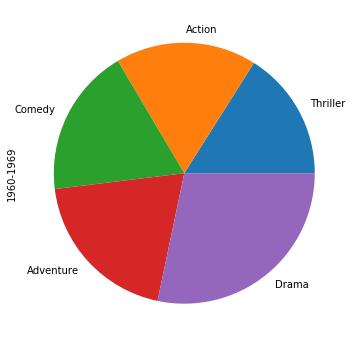

In [26]:
pop_dec_genre['1960-1969'].fillna(0).sort_values().tail(5).plot(kind='pie', figsize=(6,6));
pop_dec_genre['1960-1969'].fillna(0).sort_values().tail(5)

genre
Science Fiction     56.549067
Adventure           61.213148
Action              73.151399
Thriller            75.182114
Drama              112.081094
Name: 1970-1979, dtype: float64

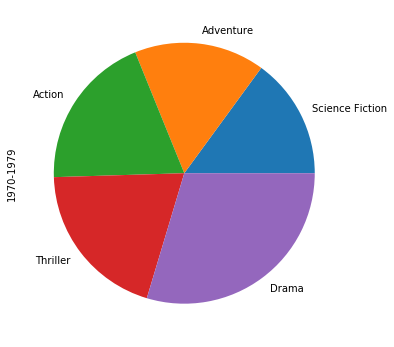

In [27]:
pop_dec_genre['1970-1979'].fillna(0).sort_values().tail(5).plot(kind='pie', figsize=(6,6));
pop_dec_genre['1970-1979'].fillna(0).sort_values().tail(5)

genre
Adventure    141.080331
Thriller     144.902107
Action       185.712457
Drama        192.884608
Comedy       217.110400
Name: 1980-1989, dtype: float64

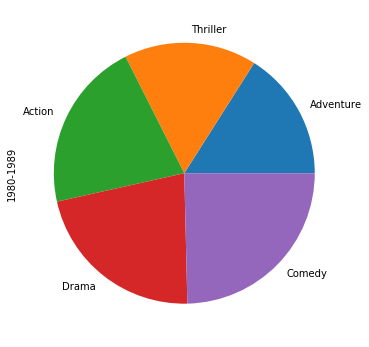

In [28]:
pop_dec_genre['1980-1989'].fillna(0).sort_values().tail(5).plot(kind='pie', figsize=(6,6));
pop_dec_genre['1980-1989'].fillna(0).sort_values().tail(5)

genre
Adventure    220.787899
Action       320.981034
Thriller     348.664018
Comedy       401.526740
Drama        499.064105
Name: 1990-1999, dtype: float64

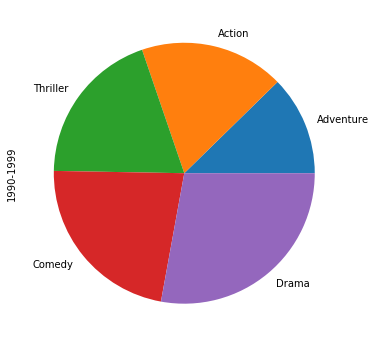

In [29]:
pop_dec_genre['1990-1999'].fillna(0).sort_values().tail(5).plot(kind='pie', figsize=(6,6));
pop_dec_genre['1990-1999'].fillna(0).sort_values().tail(5)

genre
Adventure    522.241246
Action       666.893474
Thriller     669.034615
Comedy       777.499192
Drama        887.488709
Name: 2000-2009, dtype: float64

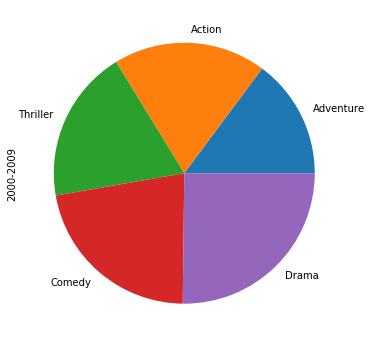

In [30]:
pop_dec_genre['2000-2009'].fillna(0).sort_values().tail(5).plot(kind='pie', figsize=(6,6));
pop_dec_genre['2000-2009'].fillna(0).sort_values().tail(5)

genre
Adventure     687.071581
Comedy        718.067256
Thriller      874.135840
Action        892.748471
Drama        1042.467310
Name: 2010-2015, dtype: float64

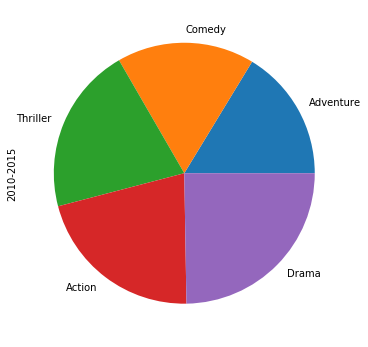

In [31]:
pop_dec_genre['2010-2015'].fillna(0).sort_values().tail(5).plot(kind='pie', figsize=(6,6));
pop_dec_genre['2010-2015'].fillna(0).sort_values().tail(5)

### What kinds of properties are associated with movies that have high revenues?

The remaining 4 questions all deal with revenue or profits in some way, so I want to start by subsetting to movies that report positive budget and revenue values.

In [32]:
#Drop rows with no budget or revenue
tmdb_money = tmdb_trim.query('revenue_adj > 0 & budget_adj > 0')
tmdb_money.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3.849000e+03,3.849000e+03
mean,39912.577033,1.192455,109.188361,528.315407,6.167238,2001.271239,4.423347e+07,1.371237e+08,9.289027e+07,2.974259e+02
std,67261.293039,1.475890,19.327321,880.371877,0.794736,11.267754,4.472972e+07,2.161678e+08,1.941697e+08,1.645323e+04
min,5.000000,0.001117,62.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08,-9.999998e-01
25%,6072.000000,0.462609,96.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840989e+07,-1.505554e+06,-1.206897e-01
50%,11319.000000,0.798104,106.000000,205.000000,6.200000,2004.000000,3.004017e+07,6.176752e+07,2.737578e+07,1.122909e+00
75%,38575.000000,1.374300,119.000000,581.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08,1.074943e+08,3.210730e+00
max,417859.000000,32.985763,219.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,1.018618e+06


At this point I was concerned that the minimum budget appears to be 0.97 in 2010 dollars and minimum revenue looks like 2.37 in 2010 dollars. So I wanted to take a look at the lowest budget movies to see what was going on.

In [33]:
#Look at the lowest budget movies
tmdb_money.sort_values(by=['budget_adj']).head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct
3581,59296,0.520430,"Love, Wedding, Marriage","[Mandy Moore, Kellan Lutz, Jessica Szohr, Autu...",Dermot Mulroney,90,"[Comedy, Romance]",2011-06-03,55,5.3,2011,0.969398,1335.830503,1334.861105,1377.000000
2618,39964,0.090186,Lost & Found,"[David Spade, Sophie Marceau, Ever Carradine, ...",Jeff Pollack,95,"[Comedy, Romance]",1999-04-23,14,4.8,1999,1.309053,130.905285,129.596232,99.000000
2398,39356,0.028456,Boy,"[James Rolleston, Craig Hall, Taika Waititi, T...",Taika Waititi,87,"[Drama, Comedy]",2010-02-14,26,7.3,2010,3.000000,43.000000,40.000000,13.333333
8944,14373,0.464188,Death Wish 2,"[Charles Bronson, Jill Ireland, Vincent Garden...",Michael Winner,88,"[Action, Crime, Thriller]",1982-02-20,27,5.6,1982,4.519285,36.154278,31.634994,7.000000
10050,20701,0.317091,Tales from the Darkside: The Movie,"[Rae Dawn Chong, Christian Slater, Deborah Har...",John Harrison,93,"[Fantasy, Horror, Comedy]",1990-05-03,37,5.8,1990,5.006696,26.702377,21.695681,4.333333


The budget and revenue values for these rows are way too low to be believable. At first I thought perhaps they represent millions of dollars instead of dollars, however when I spot checked a few titles on themoviedb.org I found the same values (only in nominal dollars rather than in 2010 dollars). Spot checking the same titles on IMDB shows very different values for budget.

I decided to apply a lower bound to the budget column to exclude rows with wildly unrealistic dollar values. Googling for the "lowest budget movies" one of the lowest examples I found was Paranormal Activity, which had a budget of around 15 thousand dollars. So I decided to use that as my lower bound for now. I didn't apply a lower bound to revenue because googling "lowest revenue movies" shows that there have been some titles out there which were truly colossal flops. Similar to the runtime restriction I imposed earlier, this is not a perfect solution but it is the best quick bandaid I could think of.

In [34]:
#Drop rows with unrealistic budget
budget_lower_bound = 15000
tmdb_money = tmdb_money.query('budget_adj > @budget_lower_bound')
tmdb_money.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct
count,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3.825000e+03,3.825000e+03,3.825000e+03,3825.000000
mean,39892.731765,1.197240,109.209412,531.075033,6.168601,2001.279477,4.451101e+07,1.379198e+08,9.340882e+07,10.165815
std,67325.118216,1.479070,19.323775,882.370936,0.794683,11.270196,4.473197e+07,2.165803e+08,1.946336e+08,263.771590
min,5.000000,0.001117,62.000000,10.000000,2.200000,1960.000000,1.577503e+04,2.370705e+00,-4.139124e+08,-1.000000
25%,6023.000000,0.464907,96.000000,72.000000,5.700000,1995.000000,1.337080e+07,1.890414e+07,-1.654431e+06,-0.124589
50%,11286.000000,0.802769,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.236688e+07,2.798561e+07,1.119489
75%,38541.000000,1.380024,119.000000,583.000000,6.700000,2010.000000,6.076720e+07,1.646649e+08,1.080251e+08,3.201912
max,417859.000000,32.985763,219.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,12889.386667


Now that I have cleaned the data to focus on dollar columns, I want to look at some scatter plots to see how numeric columns correlate with revenue. The relationship between revenue and profit is of course the most clear and obvious positive correlation since profit is directly tied to revenue.

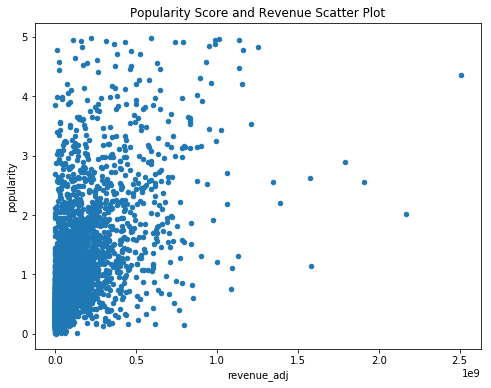

In [35]:
tmdb_money.query('popularity < 5').plot(x='revenue_adj', y='popularity', kind='scatter', figsize=(8,6))
plt.title('Popularity Score and Revenue Scatter Plot');

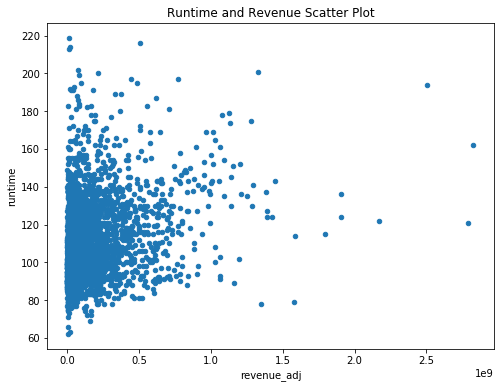

In [36]:
tmdb_money.plot(x='revenue_adj', y='runtime', kind='scatter', figsize=(8,6))
plt.title('Runtime and Revenue Scatter Plot');

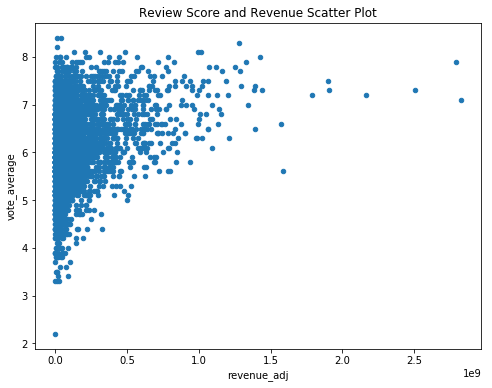

In [37]:
tmdb_money.plot(x='revenue_adj', y='vote_average', kind='scatter', figsize=(8,6))
plt.title('Review Score and Revenue Scatter Plot');

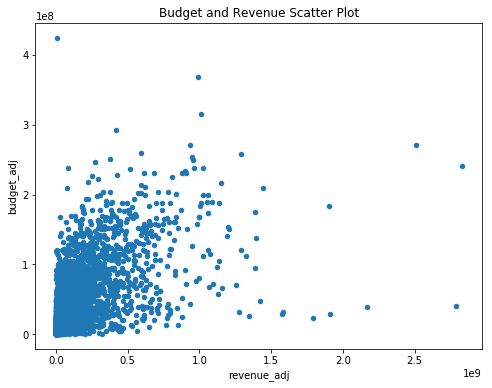

In [38]:
tmdb_money.plot(x='revenue_adj', y='budget_adj', kind='scatter', figsize=(8,6))
plt.title('Budget and Revenue Scatter Plot');

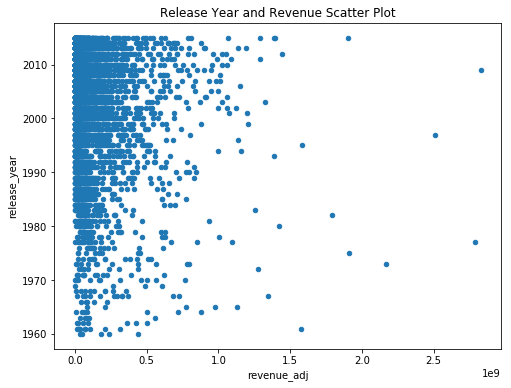

In [39]:
tmdb_money.plot(x='revenue_adj', y='release_year', kind='scatter', figsize=(8,6))
plt.title('Release Year and Revenue Scatter Plot');

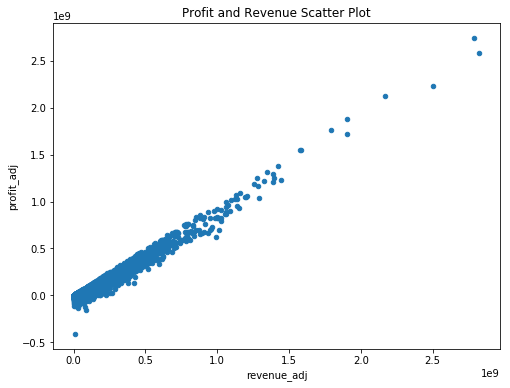

In [40]:
tmdb_money.plot(x='revenue_adj', y='profit_adj', kind='scatter', figsize=(8,6))
plt.title('Profit and Revenue Scatter Plot');

I also split the dataframe at the median in to high revenue and low revenue movies then compared the descriptive statistics of each to see how they vary.

In [41]:
#Split at the median
revenue_median = tmdb_money['revenue_adj'].median()
high_revenue = tmdb_money.query('revenue_adj >= @revenue_median')
low_revenue = tmdb_money.query('revenue_adj < @revenue_median')

In [42]:
#Get descriptive stats for high revenue movies
high_revenue.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1.913000e+03,1.913000e+03,1.913000e+03,1913.000000
mean,32309.785154,1.706886,113.570831,873.792995,6.323157,2000.122321,6.589282e+07,2.535405e+08,1.876477e+08,17.771596
std,60064.423707,1.871763,20.938751,1107.480155,0.742002,12.116704,5.015812e+07,2.583153e+08,2.395013e+08,372.016511
min,11.000000,0.010335,69.000000,10.000000,3.400000,1960.000000,1.577503e+04,6.236688e+07,-1.551102e+08,-0.649843
25%,1931.000000,0.771263,98.000000,202.000000,5.800000,1994.000000,2.878621e+07,9.684532e+07,5.681665e+07,1.153159
50%,9679.000000,1.210324,110.000000,471.000000,6.300000,2003.000000,5.236211e+07,1.646649e+08,1.080251e+08,2.393080
75%,23483.000000,1.984529,125.000000,1066.000000,6.900000,2009.000000,9.091960e+07,3.069216e+08,2.250645e+08,4.994424
max,417859.000000,32.985763,216.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,12889.386667


In [43]:
#Get descriptive stats for low revenue movies
low_revenue.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_pct
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1.912000e+03,1.912000e+03,1.912000e+03,1912.000000
mean,47479.644351,0.687326,104.845711,188.177824,6.013964,2002.437238,2.311801e+07,2.223867e+07,-8.793343e+05,2.556056
std,73111.636281,0.593379,16.445452,309.191068,0.815482,10.227155,2.390142e+07,1.817174e+07,2.506170e+07,25.281734
min,5.000000,0.001117,62.000000,10.000000,2.200000,1960.000000,1.647977e+04,2.370705e+00,-4.139124e+08,-1.000000
25%,9765.250000,0.335859,94.000000,37.000000,5.500000,1996.750000,7.331084e+06,5.678820e+06,-1.070347e+07,-0.602704
50%,14176.000000,0.543146,102.000000,86.500000,6.100000,2005.000000,1.675716e+07,1.885030e+07,-6.518656e+05,-0.071983
75%,46828.250000,0.848493,113.000000,207.000000,6.600000,2010.000000,3.165730e+07,3.608386e+07,1.238739e+07,1.078058
max,343795.000000,7.192039,219.000000,5754.000000,8.400000,2015.000000,4.250000e+08,6.225050e+07,5.936339e+07,699.000000


In [44]:
#Compare mean differences
high_revenue.mean() - low_revenue.mean()

id               -1.516986e+04
popularity        1.019560e+00
runtime           8.725120e+00
vote_count        6.856152e+02
vote_average      3.091929e-01
release_year     -2.314918e+00
budget_adj        4.277481e+07
revenue_adj       2.313018e+08
profit_adj        1.885270e+08
profit_adj_pct    1.521554e+01
dtype: float64

### Which movies have the highest/lowest budgets, profits, and review scores?

These questions are quick and easy to answer since I have already done the prep and cleaning above. I'm going to create a function to print out the top 5 list and create a small bar chart for each question.

In [45]:
#Create a function to avoid writing the same top 5 code over and over
#lowest will be a boolean where True means high and False means low
def top5(column, lowest, title, ylabel):
    topfive = tmdb_money.sort_values(by=[column], ascending=lowest).head(5)
    
    #Print top 5
    print(title)
    print(topfive[['original_title', column]])
    
    #Create bar plot
    plt.bar(topfive['original_title'], topfive[column])
    plt.title(title)
    plt.xlabel('Movie Title')
    plt.ylabel(ylabel)
    plt.xticks(rotation=90);

Top 5 Highest Budget Movies
                                   original_title    budget_adj
2244                            The Warrior's Way  4.250000e+08
3375  Pirates of the Caribbean: On Stranger Tides  3.683713e+08
7387     Pirates of the Caribbean: At World's End  3.155006e+08
6570                             Superman Returns  2.920507e+08
5231                                      Titanic  2.716921e+08


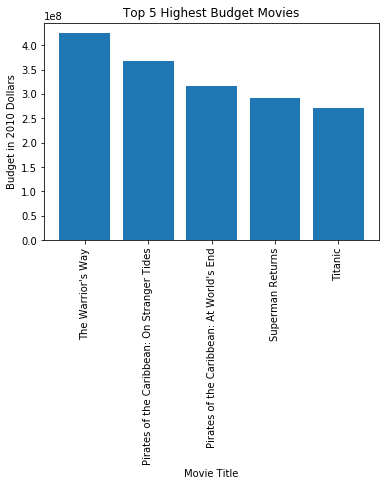

In [46]:
top5('budget_adj', False, 'Top 5 Highest Budget Movies', 'Budget in 2010 Dollars')

Top 5 Lowest Budget Movies
           original_title    budget_adj
7447  Paranormal Activity  15775.028739
3785           Bellflower  16479.766724
2227                 Howl  30000.000000
2207              Catfish  30000.000000
1871         Down Terrace  31703.562341


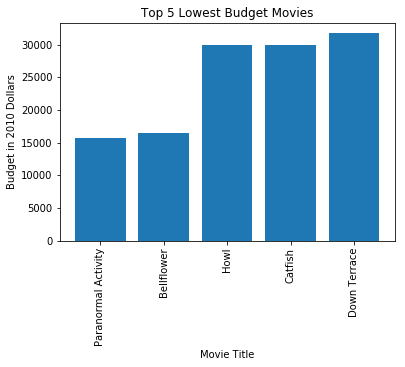

In [47]:
top5('budget_adj', True, 'Top 5 Lowest Budget Movies', 'Budget in 2010 Dollars')

Top 5 Highest Profit Movies
      original_title    profit_adj
1329       Star Wars  2.750137e+09
1386          Avatar  2.586237e+09
5231         Titanic  2.234714e+09
10594   The Exorcist  2.128036e+09
9806            Jaws  1.878643e+09


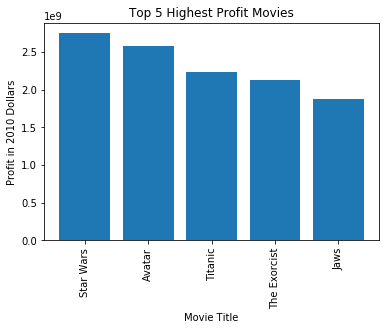

In [48]:
top5('profit_adj', False, 'Top 5 Highest Profit Movies', 'Profit in 2010 Dollars')

Top 5 Lowest Profit Movies
         original_title    profit_adj
2244  The Warrior's Way -4.139124e+08
5508    The Lone Ranger -1.551102e+08
7031          The Alamo -1.375868e+08
2435   The 13th Warrior -1.286813e+08
4970       Brother Bear -1.185350e+08


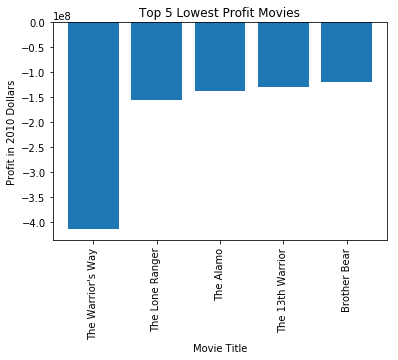

In [49]:
top5('profit_adj', True, 'Top 5 Lowest Profit Movies', 'Profit in 2010 Dollars')

Top 5 Highest Profit Movies by Percentage
               original_title  profit_adj_pct
7447      Paranormal Activity    12889.386667
2449  The Blair Witch Project     9919.000000
1354               Eraserhead      699.000000
7277           Pink Flamingos      499.000000
7178            Super Size Me      438.616585


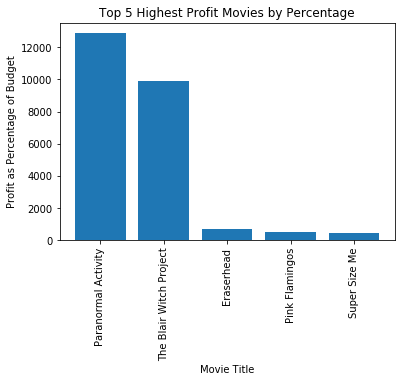

In [50]:
top5('profit_adj_pct', False, 'Top 5 Highest Profit Movies by Percentage', 'Profit as Percentage of Budget')

Top 5 Lowest Profit Movies by Percentage
                 original_title  profit_adj_pct
10307  The House of the Spirits       -1.000000
8523          Bordello of Blood       -1.000000
8142                   Mallrats       -1.000000
5067            Shattered Glass       -1.000000
7158            Chasing Liberty       -0.999999


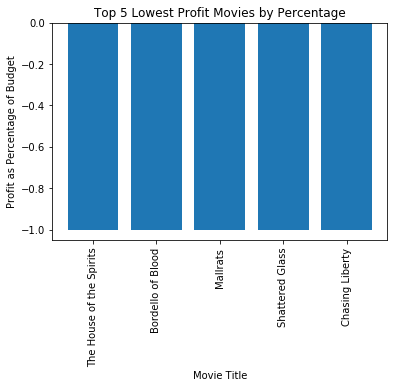

In [51]:
top5('profit_adj_pct', True, 'Top 5 Lowest Profit Movies by Percentage', 'Profit as Percentage of Budget')

Top 5 Highest Reviewed Movies
                original_title  vote_average
4178  The Shawshank Redemption           8.4
7948         Stop Making Sense           8.4
7269             The Godfather           8.3
650                   Whiplash           8.2
2875           The Dark Knight           8.1


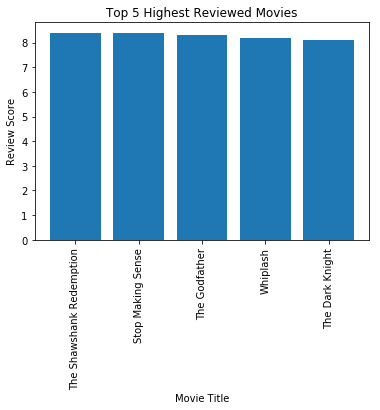

In [52]:
top5('vote_average', False, 'Top 5 Highest Reviewed Movies', 'Review Score')

Top 5 Lowest Reviewed Movies
      original_title  vote_average
4859      Foodfight!           2.2
3134  Disaster Movie           3.3
4540      Dracula 3D           3.3
4115      FearDotCom           3.3
7526      Epic Movie           3.4


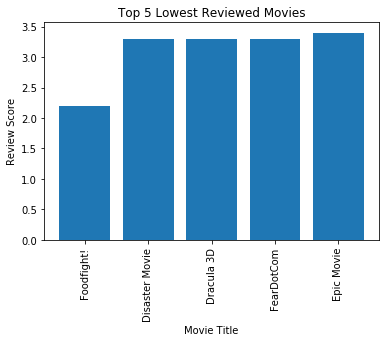

In [53]:
top5('vote_average', True, 'Top 5 Lowest Reviewed Movies', 'Review Score')

### Which actors are associated with the highest reviewed movies? Most profitable movies?

I already restricted to movies with positive budget and revenue above, but I also want to exclude any movies where I don't have cast information for this question.

In [54]:
#Check for rows with null cast
tmdb_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3825 entries, 0 to 10848
Data columns (total 15 columns):
id                3825 non-null int64
popularity        3825 non-null float64
original_title    3825 non-null object
cast              3822 non-null object
director          3824 non-null object
runtime           3825 non-null int64
genres            3825 non-null object
release_date      3825 non-null datetime64[ns]
vote_count        3825 non-null int64
vote_average      3825 non-null float64
release_year      3825 non-null int64
budget_adj        3825 non-null float64
revenue_adj       3825 non-null float64
profit_adj        3825 non-null float64
profit_adj_pct    3825 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 478.1+ KB


In [55]:
#Drop rows with null cast and check again
tmdb_actors = tmdb_money.dropna(subset=['cast'])
tmdb_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3822 entries, 0 to 10848
Data columns (total 15 columns):
id                3822 non-null int64
popularity        3822 non-null float64
original_title    3822 non-null object
cast              3822 non-null object
director          3821 non-null object
runtime           3822 non-null int64
genres            3822 non-null object
release_date      3822 non-null datetime64[ns]
vote_count        3822 non-null int64
vote_average      3822 non-null float64
release_year      3822 non-null int64
budget_adj        3822 non-null float64
revenue_adj       3822 non-null float64
profit_adj        3822 non-null float64
profit_adj_pct    3822 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 477.8+ KB


Similar to how I handled multiple genres per movie above, I want to start by getting a set of unique actors across all movies. For the sake of simplicity I'm not going to worry about fixing actor's names if they are spelled slightly differently or have special characters or have some other issue.

In [56]:
#Get a list of unique genres
unique_actors = set()

def get_actors(row):
    for actor in row['cast']:
        if actor not in unique_actors:
            unique_actors.add(actor)

#The goal of this apply is simply to fill up the unique_actors set, not to edit the dataframe
tmdb_actors.apply(get_actors, 1)
list(unique_actors)[:6]

['Oliver Cooper',
 'Dan Futterman',
 'Amila Terzimehic',
 'Santino Fontana',
 'Charles Laughton',
 'Angelo Rossitto']

Next I'm going to loop through each actor in the set, calculate the stats relevant to the question, and store them in a new dataframe.

In [57]:
#Create an empty data frame, loop through actors and create one row for each actor with the info we want
actor_df = pd.DataFrame(columns = ['mean_review','total_profit_adj','mean_profit_adj','num_movies'])

for actor in list(unique_actors):
    mask = tmdb_actors['cast'].apply(lambda x: actor in x)
    df_temp = tmdb_actors[mask]
    
    mean_review = df_temp['vote_average'].mean()
    total_profit_adj = df_temp['profit_adj'].sum()
    mean_profit_adj = df_temp['profit_adj'].mean()
    num_movies = df_temp.shape[0]
    
    actor_df.loc[actor] = [mean_review, total_profit_adj, mean_profit_adj, num_movies]

actor_df.head()

,mean_review,total_profit_adj,mean_profit_adj,num_movies
Oliver Cooper,6.5,8.357750e+07,8.357750e+07,1.0
Dan Futterman,6.5,1.981085e+07,9.905424e+06,2.0
Amila Terzimehic,6.0,1.617078e+07,1.617078e+07,1.0
Santino Fontana,7.5,1.052306e+09,1.052306e+09,1.0
Charles Laughton,6.9,3.539024e+08,3.539024e+08,1.0


Now I can look at the actors who appear in the highest reviewed movies, according to the mean review score among movies for which they are listed in the cast. This doesn't account for the significance of their role in the movie.

In [58]:
#View the actors cast in movies with the highest average review score
actor_df.sort_values(by=['mean_review'], ascending=False).head(10)

,mean_review,total_profit_adj,mean_profit_adj,num_movies
Tina Weymouth,8.4,7.932116e+06,7.932116e+06,1.0
David Byrne,8.4,7.932116e+06,7.932116e+06,1.0
Steven Scales,8.4,7.932116e+06,7.932116e+06,1.0
Chris Frantz,8.4,7.932116e+06,7.932116e+06,1.0
Jerry Harrison,8.4,7.932116e+06,7.932116e+06,1.0
Richard S. Castellano,8.3,1.246626e+09,1.246626e+09,1.0
Jayson Blair,8.2,9.849312e+06,9.849312e+06,1.0
Austin Stowell,8.2,9.849312e+06,9.849312e+06,1.0
Jonathan Sagall,8.1,4.517327e+08,4.517327e+08,1.0
Antoine-Olivier Pilon,8.0,-1.294990e+06,-1.294990e+06,1.0


This isn't as interesting as I had hoped because these all look like one-hit wonders, which makes sense - actors who have been in lots of movies are bound to have at least a few flops dragging their mean down compared to actors who only appeared in a single hit film. Let's restrict to actors cast in at least 5 movies.

In [59]:
#View the actors cast in movies with the highest average review score, minimum 5 movies
actor_df.query('num_movies >= 5').sort_values(by=['mean_review'], ascending=False).head(10)

,mean_review,total_profit_adj,mean_profit_adj,num_movies
Mark Hamill,7.680000,7.028275e+09,1.405655e+09,5.0
Carrie Fisher,7.428571,7.263715e+09,1.037674e+09,7.0
Martin Balsam,7.300000,6.348233e+08,1.269647e+08,5.0
Rupert Grint,7.200000,6.974591e+09,7.749546e+08,9.0
Steve McQueen,7.142857,1.256030e+09,1.794329e+08,7.0
Gene Wilder,7.120000,1.257415e+09,2.514831e+08,5.0
Ken Watanabe,7.120000,1.533511e+09,3.067021e+08,5.0
Audrey Hepburn,7.060000,6.268203e+08,1.253641e+08,5.0
Leonardo DiCaprio,7.057895,5.506424e+09,2.898118e+08,19.0
Harry Dean Stanton,6.983333,3.786609e+08,6.311015e+07,6.0


Next, let's look at the actors who have helped bring in the largest profits for their employers over the course of their career.

In [60]:
#View the actors cast in movies totaling the highest profits across their career
actor_df.sort_values(by=['total_profit_adj'], ascending=False).head(10)

,mean_review,total_profit_adj,mean_profit_adj,num_movies
Harrison Ford,6.452941,1.180842e+10,3.473063e+08,34.0
Tom Cruise,6.478788,8.361769e+09,2.533869e+08,33.0
Tom Hanks,6.741176,8.079465e+09,2.376313e+08,34.0
Carrie Fisher,7.428571,7.263715e+09,1.037674e+09,7.0
Emma Watson,6.900000,7.212040e+09,6.010033e+08,12.0
Daniel Radcliffe,6.900000,7.071884e+09,5.893237e+08,12.0
Mark Hamill,7.680000,7.028275e+09,1.405655e+09,5.0
Rupert Grint,7.200000,6.974591e+09,7.749546e+08,9.0
Ian McKellen,6.821429,6.576084e+09,4.697203e+08,14.0
Sean Connery,6.339130,6.181236e+09,2.687494e+08,23.0


These are definitely the kinds of big name actors I was expecting and many of them appear in big hit film series with lots of movies such as Star Wars and Harry Potter. Some of them gain a large edge in this list by being extremely prolific actors, appearing in up to 34 movies across their career. Out of curiousity, let's look at actors cast in movies with the highest average profit instead of total to see some of the less prolific actors who bring in the most money per movie.

In [61]:
#View the actors cast in movies with the highest average profit, minimum 5 movies
actor_df.query('num_movies >= 5').sort_values(by=['mean_profit_adj'], ascending=False).head(10)

,mean_review,total_profit_adj,mean_profit_adj,num_movies
Mark Hamill,7.680000,7.028275e+09,1.405655e+09,5.0
Carrie Fisher,7.428571,7.263715e+09,1.037674e+09,7.0
Rupert Grint,7.200000,6.974591e+09,7.749546e+08,9.0
Emma Watson,6.900000,7.212040e+09,6.010033e+08,12.0
Daniel Radcliffe,6.900000,7.071884e+09,5.893237e+08,12.0
Ray Romano,6.140000,2.555684e+09,5.111369e+08,5.0
Stephen Lang,6.080000,2.483016e+09,4.966032e+08,5.0
Orlando Bloom,6.625000,5.943292e+09,4.952743e+08,12.0
Julie Andrews,6.350000,4.725786e+09,4.725786e+08,10.0
Ian McKellen,6.821429,6.576084e+09,4.697203e+08,14.0


<a id='conclusions'></a>
## Conclusions

These results may only be as accurate and complete as the data they are based on. While cleaning TMDb, I encountered several issues that may raise questions regarding the scope of the data and data quality:

1. In addition to traditional movies, there are many other types of videos in TMDb including multi-part documentaries, TV mini-series, and animated shorts.
2. More than half of the movies in the database were missing budget and revenue information.
3. Several movies had budget and revenue values that were far too low to be realistic.
4. I don't know exactly how popularity score is calculated and there are some large outliers.

I did my best to address each of these concerns for each question I was answering.

### Which genres are most popular from year to year?

These conclusions regarding popularity by genre over time are based on the total popularity score among movies in each genre, where popularity is a column provided in TMDb. According to themoviedb.org, popularity is a score based on "...views, number of user ratings/watchlist/favourite additions and release date". Movies with multiple genres have their full popularity score added to each genre they are listed under.

1. Drama is the most popular genre in TMDb for every decade except the 1980s when it was overtaken by Comedy.
2. Action, Thriller, and Adventure are in the top 5 most popular genres for every decade.
3. Comedy is in the top 5 most popular genres for every decade except the 1970s, where it is overtaken by Science Fiction.

### What kinds of properties are associated with movies that have high revenues?

These conclusions are drawn from the scatter plots shown above as well as the comparison of descriptive statistics among the top and bottom 50% of movies. Budget, revenue, and profit values used are all in 2010 dollars. After cleaning out movies with either 0 budget, 0 revenue, or an unrealistically low budget there were only 3,825 movies remaining in the data which these conclusions are based on.

1. After removing outliers with very high popularity scores, it is easier to see that movies with higher popularity score tend to have higher revenue.
2. Revenue appears to be positively correlated with mean review score, budget, and release year.
3. Movies in the top 50% of revenue have higher mean popularity, runtime, review score, and budget.

### Which movies have the highest/lowest budgets, profits, and review scores?

I decided to leave out results related to lowest budget because I implemented an artificial lower bound on the budget to drop movies with unrealistically low budgets. I also decided to leave out results related to lowest profit percentages because they were all movies that essentially lost 100% of their budget and weren't titles that seemed interesting. Budget, revenue, and profit values used are all in 2010 dollars. After cleaning out movies with either 0 budget, 0 revenue, or an unrealistically low budget there were only 3,825 movies remaining in the data which these conclusions are based on.

1. Highest Budgets: The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Superman Returns, Titanic
2. Highest Profits (Total): Star Wars, Avatar, Titanic, The Exorcist, Jaws
3. Highest Profits (Pct): Paranormal Activity, The Blair Witch Project, Eraserhead, Pink Flamingos, Super Size Me
4. Highest Review Scores: The Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash, The Dark Knight
5. Lowest Profits (Total): The Warrior's Way, The Lone Ranger, The Alamo, The 13th Warrior, Brother Bear
6. Lowest Review Scores: Foodfight!, Disaster Movie, Dracula 3D, FearDotCom, Epic Movie

### Which actors are associated with the highest reviewed movies? Most profitable movies?

I chose to restrict to actors who appear in at least 5 movies to filter out some of the one-hit wonders. We see a high representation of Star Wars and Harry Potter actors in the highest reviewed and most profitable lists along with other prolific super stars. Budget, revenue, and profit values used are all in 2010 dollars. After cleaning out movies with either 0 budget, 0 revenue, an unrealistically low budget, or no cast information there were only 3,822 movies remaining in the data which these conclusions are based on.

1. Highest Reviewed: Mark Hamill, Carrie Fisher, Maartin Balsam, Rupert Grint, Steve McQueen
2. Most Profitable (Total): Harrison Ford, Tom Cruise, Tom Hanks, Carrie Fisher, Emma Watson
3. Most Profitable (Per Movie): Mark Hamill, Carrie Fisher, Rupert Grint, Emma Watson, Daniel Radcliffe

### External Sources
Along with Udacity lessons I used Google, Stack Overflow, themoviedb.org, and IMDB when putting together this notebook.